In [1]:
import numpy as np
from matplotlib import pyplot as plt

from RBM import RBM
from utils import show_img
import scipy.io as sio

# Load & pre-process data

In [2]:
num_class = 36
input_shape = (20, 16)

classlabels = sio.loadmat('data/binaryalphadigs.mat')['classlabels'][0]
dat = sio.loadmat('data/binaryalphadigs.mat')['dat']
num_example = 39

X = np.zeros((num_class, num_example, *input_shape))

for idx_class in range(num_class):
    X[idx_class] = np.array([*dat[idx_class,:]])
    
X = X.reshape((-1, np.prod(input_shape)))

# Shuffle
p = np.random.permutation(X.shape[0])
X = X[p,]

print(f"X: {X.shape}")

X: (1404, 320)


# Params

In [3]:
q = 10
n = np.prod(input_shape)

# Training

In [4]:
rbm = RBM(q=16, n=n)

100%|██████████| 30/30 [01:25<00:00,  5.72s/it]


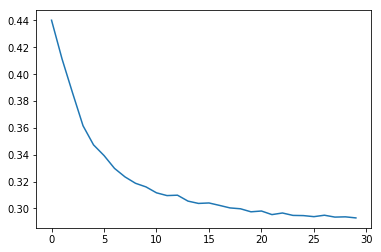

In [5]:
# rbm.train(symbols[6], epochs=20, lr=1e-2)
rbm.train(X, epochs=30, lr=1e-2)

# Visualization

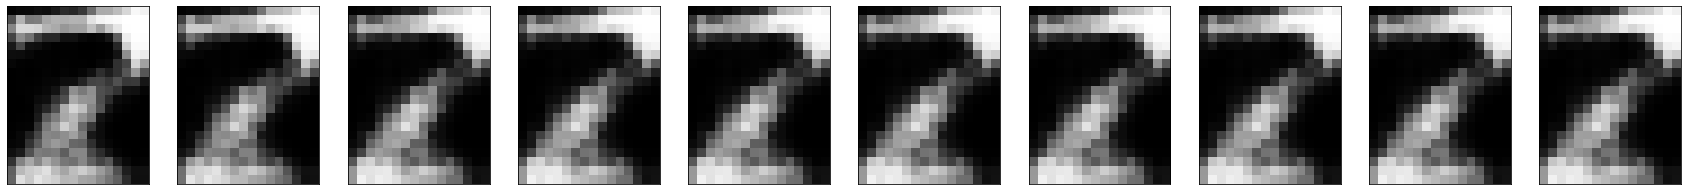

In [6]:
plt.figure(figsize=(30, 20))
n_iter_plot = 10

output = np.random.normal(size=(1, np.prod(input_shape)))

for n_iter in range(n_iter_plot):
    # Generate image
    output = rbm.backward(rbm.forward(output))
    img = np.squeeze(output.reshape(input_shape))
    
    # Show
    ax = plt.subplot(1, n_iter_plot, n_iter + 1)
    plt.imshow(img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

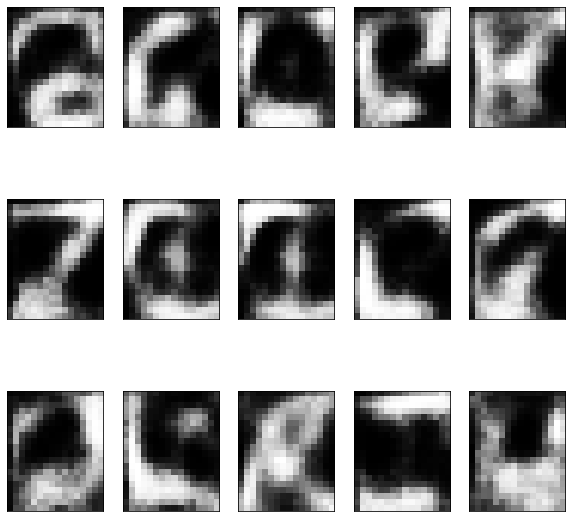

In [7]:
plt.figure(figsize=(10, 10))
n_lignes = 5
n_col = 3

n_iter = 10
    
for i in range(n_lignes * n_col):
    # Generate image
    output = np.random.normal(size=(1, np.prod(input_shape)))
    for _ in range(n_iter):
        output = rbm.backward(rbm.forward(output))
    img = np.squeeze(output.reshape(input_shape))
    
    # Show
    ax = plt.subplot(n_col, n_lignes, i + 1)
    plt.imshow(img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)